# **CoinMarketCap Dataset For Time Series Analysis**

Cryptocurrencies are a fast adapting medium of digital currency over the globe. These digital currencies are easily available to purchase with authenticity on many different websites, making it accessible to everyone, and with retailers accepting and trading various cryptocurrencies, money market scenarios are changing and going through a major change. Cryptocurrency is based on blockchain technology, which is a revolutionarily distributed digital backbone. Blockchain implements secure, decentralized systems that can aid in conquering organizational issues of trust, privacy, and security that have been around the work culture throughout the ages. 

#Analysis

For these continuous changes of values over a while, time series analysis and forecasting are used. Recurrent Neural Networks and Long Short Term Memory are an important part of machine learning algorithms being used for time-series predictions.

For demonstration, we will be using complete cryptocurrency market history data from [Kaggle](https://www.kaggle.com/taniaj/cryptocurrency-market-history-coinmarketcap), which has data scrapped from CoinMarketCap 2014 to 2018 containing 887 cryptos token information. Now let’s do some time series analysis on this data to infer insights out of it. 

In [ ]:
# !gdown https://drive.google.com/uc?id=1eAiGJyJJWaMWuEQJlnLYmBNu1x9CmZI0

In [ ]:
# !unzip all_currencies.csv.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/time_series_coin_market_data/all_currencies.csv",parse_dates=["Date"], index_col="Date")
df.head(5)

,Unnamed: 0,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2015-11-12,0,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
2015-11-13,1,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2015-11-14,2,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
2015-11-15,3,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
2015-11-16,4,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [4]:
df.index

DatetimeIndex(['2015-11-12', '2015-11-13', '2015-11-14', '2015-11-15',
               '2015-11-16', '2015-11-17', '2015-11-18', '2015-11-19',
               '2015-11-20', '2015-11-21',
               ...
               '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
               '2018-09-26', '2018-09-27'],
              dtype='datetime64[ns]', name='Date', length=632218, freq=None)

The dataset consists of 8 attributes:


> * Date: The date of observation.
> * Symbol: The symbol of a particular crypto token.
> * Open: The opening price of the stock of each day.
> * High: The highest value over the period.
> * Low: The lowest value over the period.
> * Close: The closing price each day of the stock.
> * Volume: The total amount of security changes over a given period. 
> * Market Cap: It is the total amount in the dollar market value of a company’s outstanding shares.

In [5]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap
count,632218.000000,6.322180e+05,6.322180e+05,6.322180e+05,6.322180e+05,6.268830e+05,5.678410e+05
mean,572.071192,2.030191e+02,2.442086e+02,1.636501e+02,2.011948e+02,9.471200e+06,2.484729e+08
std,441.700977,8.820248e+03,1.157252e+04,6.428827e+03,8.707400e+03,2.077056e+08,4.454570e+09
min,0.000000,2.500000e-09,3.200000e-09,2.300000e-09,2.500000e-09,0.000000e+00,0.000000e+00
25%,206.000000,7.900000e-04,9.190000e-04,6.880000e-04,7.900000e-04,5.400000e+01,3.786400e+04
50%,464.000000,9.589500e-03,1.098000e-02,8.461000e-03,9.583000e-03,7.230000e+02,2.532080e+05
75%,868.000000,1.186272e-01,1.337490e-01,1.060338e-01,1.185665e-01,1.550250e+04,2.454240e+06
max,1978.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261413e+11


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632218 entries, 2015-11-12 to 2018-09-27
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  632218 non-null  int64  
 1   Symbol      632218 non-null  object 
 2   Open        632218 non-null  float64
 3   High        632218 non-null  float64
 4   Low         632218 non-null  float64
 5   Close       632218 non-null  float64
 6   Volume      626883 non-null  float64
 7   Market Cap  567841 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 43.4+ MB


((632218, 8), None)

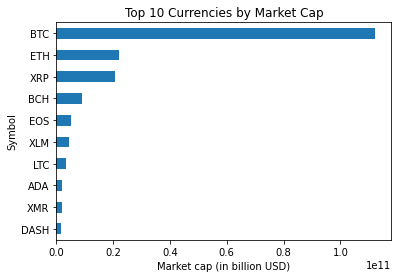

In [7]:
ax = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

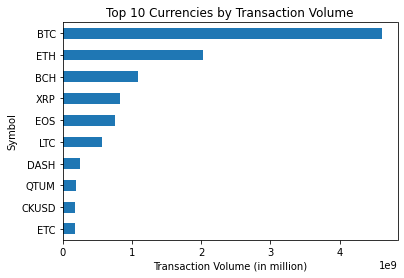

In [8]:
ax = df.groupby(['Symbol'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [9]:
top_5_currency_names = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['Symbol'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

,Unnamed: 0,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2017-07-23,0,BCH,555.89,578.97,411.78,413.06,85013.0,NaN
2017-07-24,1,BCH,412.58,578.89,409.21,440.70,190952.0,NaN
2017-07-25,2,BCH,441.35,541.66,338.09,406.90,524908.0,NaN
2017-07-26,3,BCH,407.08,486.16,321.79,365.82,1784640.0,NaN
2017-07-27,4,BCH,417.10,460.97,367.78,385.48,533207.0,NaN


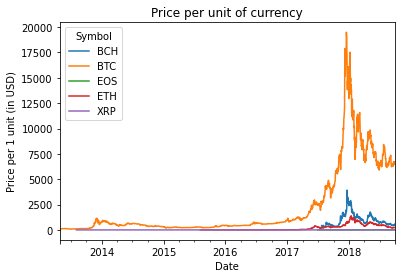

In [10]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

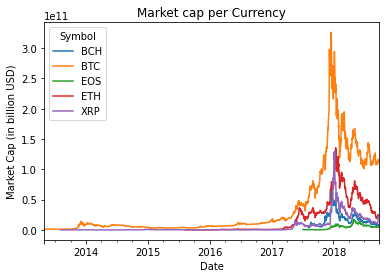

In [11]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Market Cap'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency");

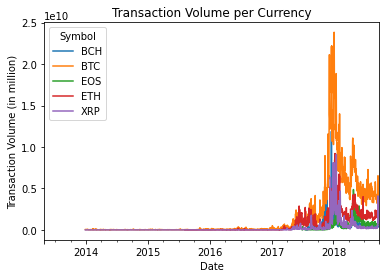

In [12]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Volume'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

<AxesSubplot:xlabel='Date'>

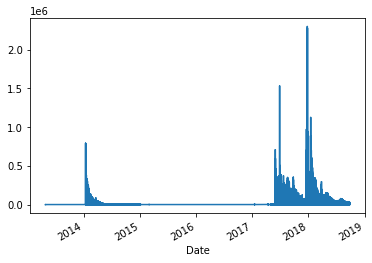

In [13]:
%matplotlib inline
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

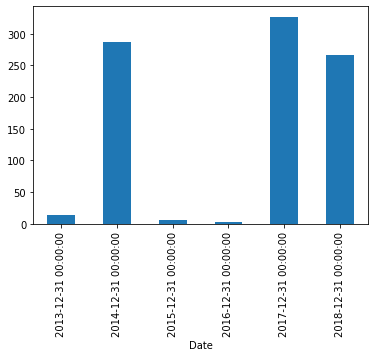

In [14]:
df['Close'].resample('Y').mean().plot(kind='bar')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

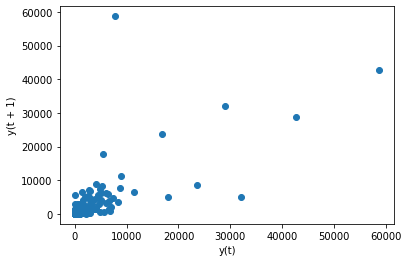

In [15]:
from pandas.plotting import lag_plot

lag_plot(df['Volume'].tail(250))

<AxesSubplot:xlabel='Date'>

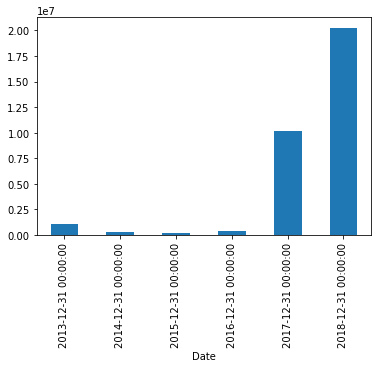

In [16]:
df['Volume'].resample('Y').mean().plot.bar()

In [17]:
df_BTC = df.loc[df['Symbol'] == 'BTC',['Close']]
df_BTC.shape

(1979, 1)

In [18]:
train = df_BTC[:'2018'].values
valid = df_BTC['2018':].values

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_BTC)

In [20]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

2022-02-02 21:32:27.256980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-02 21:32:27.257147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

2022-02-02 21:32:36.000668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-02 21:32:36.000716: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-02 21:32:36.000743: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (samuel-VirtualBox): /proc/driver/nvidia/version does not exist
2022-02-02 21:32:36.001064: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

In [ ]:
inputs = df_BTC[len(df_BTC) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
train = df_BTC[:'2018']
valid = df_BTC['2018':]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

#**Related Articles:**

> * [CoinMarketCap Dataset for Time Series Analysis](https://analyticsindiamag.com/guide-to-coinmarketcap-dataset-for-time-series-analysis-historical-prices-of-all-cryptocurrencies/)

> * [Time Series Data Analysis on Forex Historical Dataset](https://analyticsindiamag.com/applying-time-series-analysis-on-forex-historical-dataset/)

> * [Analyzing Climate Change](https://analyticsindiamag.com/time-series-analysis-on-climate-change/)

> * [TadGAN](https://analyticsindiamag.com/hands-on-guide-to-tadgan-with-python-codes/)

> * [Pastas](https://analyticsindiamag.com/guide-to-pastas-a-python-framework-for-hydrogeological-time-series-analysis/)

> * [Bitcoin Price Prediction](https://analyticsindiamag.com/guide-to-implementing-time-series-analysis-predicting-bitcoin-price-with-rnn/)